In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
df1 = pd.read_csv('exercise.csv')
df2 = pd.read_csv('calories.csv')

In [83]:
df1.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7


In [84]:
df2.head(3)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0


In [85]:
df = pd.concat([df1, df2.drop('User_ID', axis =1)], axis =1)

In [86]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
User_ID       15000 non-null int64
Gender        15000 non-null object
Age           15000 non-null int64
Height        15000 non-null float64
Weight        15000 non-null float64
Duration      15000 non-null float64
Heart_Rate    15000 non-null float64
Body_Temp     15000 non-null float64
Calories      15000 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [128]:
sum(df1['User_ID']-df2['User_ID'])

0

In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
le = LabelEncoder()

In [91]:
le.fit(df['Gender'])

LabelEncoder()

In [92]:
df['Gender'] = le.transform(df['Gender'])

In [93]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


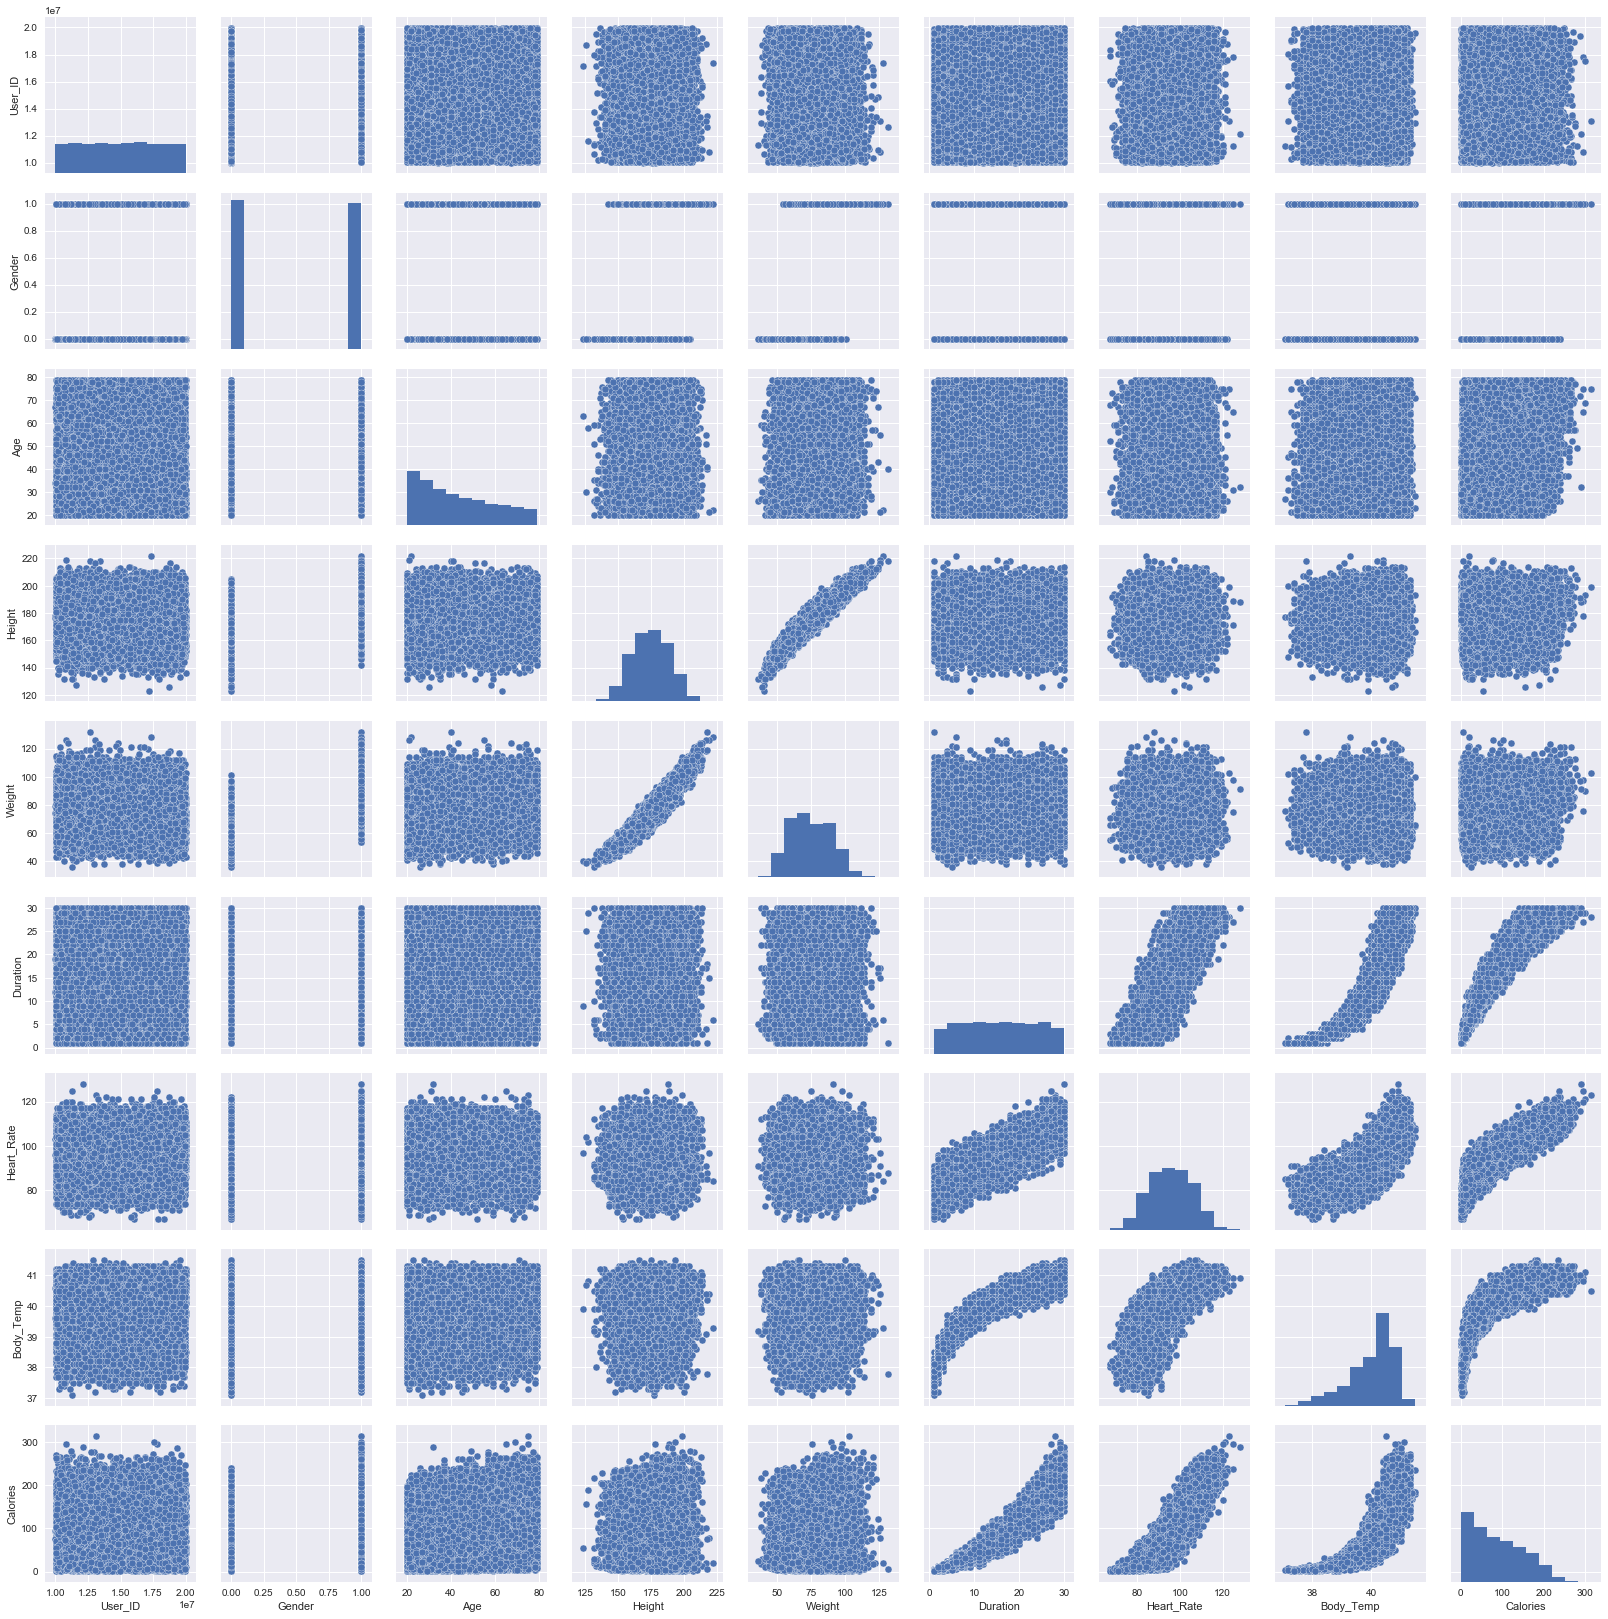

In [94]:
sns.pairplot(df)

In [95]:
df['Duration_2'] = df['Duration']**2
df['Heart_Rate_2'] = df['Heart_Rate']**2

In [96]:
df['Calories_ln'] = np.log(df['Calories'])

In [97]:
df.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Duration_2,Heart_Rate_2,Calories_ln
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0,841.0,11025.0,5.442418
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0,196.0,8836.0,4.189655
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0,25.0,7744.0,3.258097


In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [103]:
sc = StandardScaler()
mms = MinMaxScaler()

In [100]:
sc.fit(df[['Height', 'Weight', 'Heart_Rate', 'Heart_Rate_2']])
df[['Height', 'Weight', 'Heart_Rate', 'Heart_Rate_2']] = sc.transform(df[['Height', 'Weight', 'Heart_Rate', 'Heart_Rate_2']])

In [104]:
mms.fit(df[['Age', 'Duration', 'Duration_2']])
df[['Age', 'Duration', 'Duration_2']] = mms.transform(df[['Age', 'Duration', 'Duration_2']])

In [105]:
df.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Duration_2,Heart_Rate_2,Calories_ln
0,14733363,1,0.813559,1.089582,1.265909,0.965517,0.989404,40.8,231.0,0.934372,0.987193,5.442418
1,14861698,0,0.000000,-0.593726,-0.995458,0.448276,-0.158461,40.3,66.0,0.216908,-0.207123,4.189655
2,11179863,1,0.830508,0.318066,0.268247,0.137931,-0.784569,38.7,26.0,0.026696,-0.802917,3.258097


In [106]:
x = df.drop(['User_ID', 'Calories', 'Calories_ln'], axis =1)
y = df['Calories_ln']

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [110]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10500, 9)
(4500, 9)
(10500,)
(4500,)


In [111]:
from sklearn.linear_model import LinearRegression

In [113]:
lr = LinearRegression()

In [114]:
pred_train = lr.fit(X_train, y_train).predict(X_train)
pred_test = lr.fit(X_train, y_train).predict(X_test)

In [118]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [121]:
print('R2 Score Train Error:', r2_score(y_train, pred_train))
print('R2 Score Test Error:', r2_score(y_test, pred_test))

R2 Score Train Error: 0.9740522655605237
R2 Score Test Error: 0.9743118857460972


In [124]:
print('RMSE Train Error:', mean_squared_error(y_train, pred_train))
print('RMSE Test Error:', mean_squared_error(y_test, pred_test))

RMSE Train Error: 0.025702616425984523
RMSE Test Error: 0.025802823291622524


In [126]:
print('MAE Train Error:', mean_absolute_error(y_train, pred_train))
print('MAE Test Error:', mean_absolute_error(y_test, pred_test))

MAE Train Error: 0.11379249105025648
MAE Test Error: 0.11508068102033836
